# 모델 평가와 성능 향상 (p.323)

In [78]:
# 기존 점수

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression().fit(X_train, y_train)

print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


# 5-겹 교차 검증 (Cross Validation)

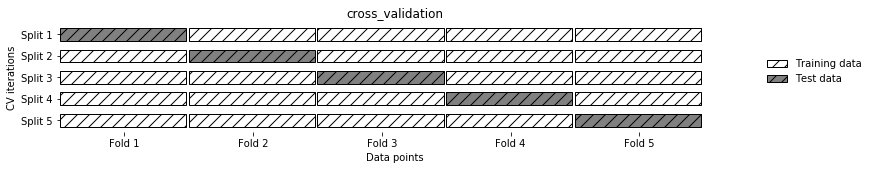

In [79]:
import mglearn
mglearn.plots.plot_cross_validation()

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter = 1000)

# 모델, 훈련 데이터, 타깃 레이블
scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96078431 0.92156863 0.95833333]


In [81]:
# cv=5인 교차 검증 ==> 폴드 수는 cv 매개변수를 사용해서 변경
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)

print("교차 검증 점수:", scores)

교차 검증 점수: [1.         0.96666667 0.93333333 0.9        1.        ]


In [82]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.96


In [83]:
# 분할시 훈련과 테스트에 걸린 시간을 딕셔너리로 반환
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                    return_train_score=True)
display(res)

{'fit_time': array([0.        , 0.00099778, 0.00099707, 0.0009973 , 0.00099778]),
 'score_time': array([0.00099707, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([0.95      , 0.96666667, 0.96666667, 0.975     , 0.95833333])}

In [84]:
import pandas as pd
res_df = pd.DataFrame(res) # 딕셔너리를 df로 변환
display(res_df)

print("평균 시간과 점수:\n", res_df.mean())
# 연산 비용이 늘어남
# 모델을 k개 만들어야 하므로 하나의 모델보다 k배 느림

,fit_time,score_time,test_score,train_score
0,0.000000,0.000997,1.000000,0.950000
1,0.000998,0.000000,0.966667,0.966667
2,0.000997,0.000000,0.933333,0.966667
3,0.000997,0.000000,0.900000,0.975000
4,0.000998,0.000000,1.000000,0.958333


평균 시간과 점수:
 fit_time       0.000798
score_time     0.000199
test_score     0.960000
train_score    0.963333
dtype: float64


# 계층별(Stratified) k-겹 교차 검증과 그외 전략들

In [85]:
print("iris 레이블:\n", iris.target)

iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


* 1/3은 클래스 0, 1/3은 클래스 1, 1/3은 클래스 2
* 첫 번째 폴드는 클래스 0만 가지고 있으므로 정확도는 0
* 두 번째, 세 번째도 같은 방법으로 정확도는 0

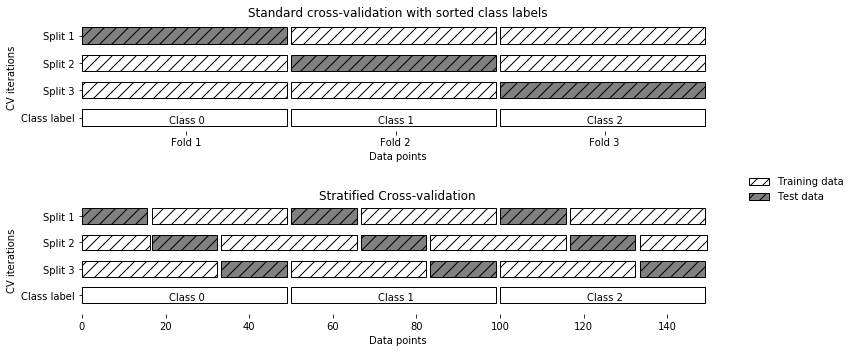

In [86]:
mglearn.plots.plot_stratified_cross_validation()

* 단순한 k-겹 교차 검증에는 문제가 있으나, scikit-learn은 분류일 경우 이 방법 대신 계층별 k-겹 교차 검증을 사용
* 예를 들어 90%가 클래스 A, 10%가 클래스 B인 데이터라면, 계층별 교차 검증은 각 폴드에 9:1 비율대로 만든다.

## 분류기의 일반화 성능을 측정할 때 k-겹 교차 검증보다 더 안정적인 계층별 k-겹 교차검증을 사용하는 것이 더 좋다.

# 교차 검증 상세 옵션

* 대부분의 경우 회귀에서는 k-겹 교차검증, 분류에서는 계층별 k-겹 교차검증의 기본값이 잘 작동
* model_selection에서 KFold 분할기를 임포트하고 원하는 폴드 수를 넣어 객체를 생성 행야함

In [87]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5) # KFold 객체 생성

In [88]:
print("교차 검증 점수:\n",
     cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [89]:
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n",
     cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0. 0. 0.]


* n_splits = 3 일 때 각 폴드는 iris 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습할 수가 없다.
* 데이터를 섞어서 샘플의 순서를 랜덤(KFold의 shuffle 매개변수를 True)로 하면 학습 가능

In [90]:
kfold = KFold(n_splits=3, shuffle = True, random_state = 0)
print("교차 검증 점수:\n",
     cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [0.9  0.96 0.96]


In [91]:
for n in [3, 5]:
    kfold = KFold(n_splits = n, shuffle = True, random_state = 0)
    scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
    print('n_snplits = {}, cross validation score : {}'.format(n, scores))

n_snplits = 3, cross validation score : [0.9  0.96 0.96]
n_snplits = 5, cross validation score : [0.96666667 0.9        0.96666667 0.96666667 0.93333333]


## LOOCV(Leave-One-Out cross-validation)

* LOOCV 교차 검증은 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증
* 테스트 폴드에 단 하나의 샘플만 포함
* 데이터셋이 클 때는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 좋은 결과를 만들어냄
* LOOCY가 K-fold보다 성능이 더 좋다.

In [92]:
from sklearn.model_selection import LeaveOneOut
# 1) loo
loo = LeaveOneOut()
scores_loo = cross_val_score(logreg, iris.data, iris.target, cv=loo)

# 2) K-fold
kfold = KFold(n_splits=5, random_state = 0, shuffle = True)
scores_fold = cross_val_score(logreg, iris.data, iris.target, cv=kfold)

In [93]:
print('iris.data.shape \n{}'.format(iris.data.shape))
print('교차 검증 분할 횟수: ', len(scores_loo))
print('loo_평균 정확도: {:.3f}'.format(scores_loo.mean()))
print('kfold_평균 정확도: {:.3f}'.format(scores_fold.mean()))

iris.data.shape 
(150, 4)
교차 검증 분할 횟수:  150
loo_평균 정확도: 0.953
kfold_평균 정확도: 0.947


### 임의 분할 교차 검증
* Train_size 만큼의 데이터로 훈련 세트를 만들고 test_size만큼의 데이터로 테스트 세트를 n_splits 만큼 만들도록 분할
* Sklearn에서는 ShuffleSplit 클래스 제공
* 10개의 데이터셋으로 나누고 5개는 훈련 세트, 2개는 테스트 세트로 4번 반복하는 사례

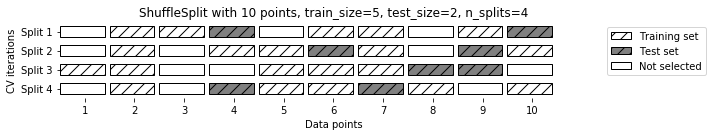

In [94]:
mglearn.plots.plot_shuffle_split()

### 데이터 셋의 50%는 훈련 세트, 50%는 테스트 세트로 10번 반복 분할
* train_size, test_size가 정수이면 세트 개수이며 실수이면 비율을 나타냄

In [95]:
from sklearn.model_selection import ShuffleSplit
# ShuffleSplit 객체 생성
shuffle_split = ShuffleSplit(test_size= .5, train_size = .5, n_splits = 10)
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.92       0.73333333 0.93333333 0.86666667 0.90666667 0.90666667
 0.94666667 0.89333333 0.97333333 1.        ]


* Train_size와 test_size의 합이 전체 데이터셋과 다르게 하여 일부만 사용하는 이러한 부분 샘플링(subsampling)은 대규모 데이터셋으로 작업할 때 도움이 됨

### 그룹별 교차검증
* 훈련세트와 테스트세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 교차검증
* 데이터셋에 없는 사람의 표정을 정확히 구분할 수 있는 분류기를 만드는 것이 목표
* Sklearn에서는 GroupKFold 클래스 및 groups 배열 제공

In [96]:
from sklearn.model_selection import GroupKFold
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.75       0.8        0.66666667]


### 인위적인 데이터셋을 이용한 그룹별 교차검증
* 각 분할에서 한 그룹은 훈련세트이거나 테스트세트로 분류

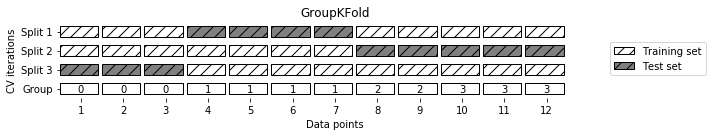

In [97]:
mglearn.plots.plot_group_kfold()

https://scikit-learn.org/stable/modules/cross_validation.html

# 그리드 서치(Grid Search)

### 간단한 그리드 서치
* 매개변수를 튜닝하여 일반화 성능 높이기
* 가장 널리 사용하는 방법은 그리드 서치(grid search)
* 관심있는 매개변수들을 대상으로 가능한 모든 조합 시도해 보는 것
* RBF 커널 SVM 사례 커널의 폭에 해당하는 gamma와 규제 매개변수 C에 0.001,
0.01, 0.1 1, 10, 100 값을 적용 (p.337 표)

### 붓꽃 데이터 셋을 이용한 그리드 서치
* 두 매개변수 조합에 대해 분류기 학습 및 평가하는 그리드 서치

In [135]:
# 간단한 그리드 서치 구현
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   random_state = 0)
print("훈련 세트의 크기: {} 테스트 세트의 크기: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개 변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
                              
print('최고 점수: {:.3f}'.format(best_score))
print('최적 파라미터:', best_parameters)

훈련 세트의 크기: 112 테스트 세트의 크기: 38
최고 점수: 0.974
최적 파라미터: {'C': 100, 'gamma': 0.001}


* grid search를 통해 C=100, gamma: 0.001일 때 가장 좋은결과임을 확인
* 이 결과를 보면 이 데이터셋에서 모델 정확도가 97.4%
* 이 정확도는 새로운 데이터까지 이어지지 않을 수 있다.
* 매개변수를 조정하기 위해 테스트 세트를 이미 사용
* 테스트세트는 모델이 얼마나 좋은지 평가하는 데 사용할 수 없다.
* 즉 평가를 위해서는 모델을 만들때 사용하지 않은 독립된 데이터셋이 필요

### 매개변수 과대적합과 검증 세트
* 매개변수 조정 시 사용한 검증 세트 대신 모델 평가를 위한 테스트 세트 필요
* 데이터를 세 개의 세트로 구분할 필요가 있음 훈련세트, 매개변수 조정을 위한 검증세트, 모델 평가를 위한 테스트 세트

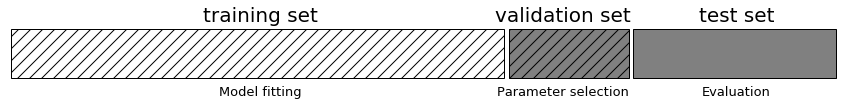

In [99]:
mglearn.plots.plot_threefold_split()

### 1. train_test_split을 이용한 iris 데이터의 grid search
* 매개변수 검증 세트 사용
* 데이터를 훈련, 검증, 테스트 세트로 분할

In [100]:
from sklearn.svm import SVC
# Train Data : 모델을 학습하는데 사용하는 데이터 (모델이 알고 있는 학습할 데이터)
# Valid Data : 학습한 모델의 성능을 검증하는 데이터 (모델이 모르는 학습하지 않을 데이터)
# Test Data : 학습한 모델로 예측할 데이터 (모델이 모르는 데이터)

X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state = 0)

X_train, X_valid, y_train, y_valid = train_test_split(
        X_trainval, y_trainval, random_state = 1) # 한번 더 나눔
print("훈련 세트의 크기: {} 검증 세트의 크기 : {} 테스트 세트의 크기:" 
      "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개 변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

svm = SVC(**best_parameters) # ## 딕셔너리 형태로 함수에 파라메터를 넘김
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터:", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84 검증 세트의 크기 : 28 테스트 세트의 크기:38

검증 세트에서 최고 점수: 0.96
최적 파라미터: {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


* 최적 매개변수에서 최고점수는 96%이며 테스트 세트 점수는 92%
* 즉 새로운 데이터에 대해 92%만 정확하게 분류
* 테스트 세트로 둘 이상의 모델을 평가해서 그 중 더 나은 하나를 선택하는 것은 모델의 정확도를 매우 낙관적으로 추정하거나, overfitting이 생길 수 있으므로 주의

### 교차 검증을 사용한 그리드 서치
* 교차검증으로 각 매개변수 조합 성능 평가
* cross_validation을 통해 어떤 매개변수가 선택되었는지를 살펴보면

In [101]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다
        score = np.mean(scores)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_paramaters = {'C': C, 'gamma':gamma}
            
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_paramaters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

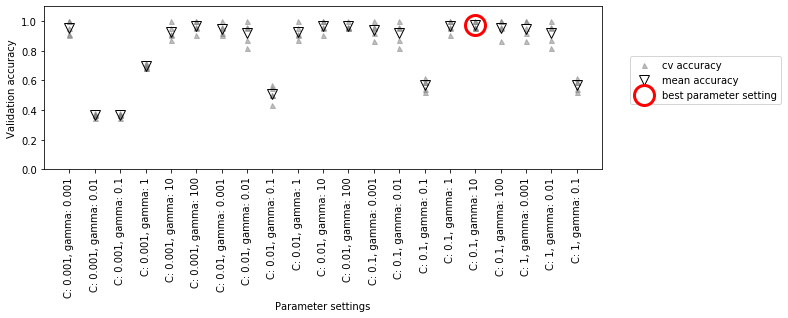

In [103]:
# 교차검증을 위한 그리드 서치
# 교차 검증의 정확도 평균이 가장 높은 값 선택
mglearn.plots.plot_cross_val_selection()

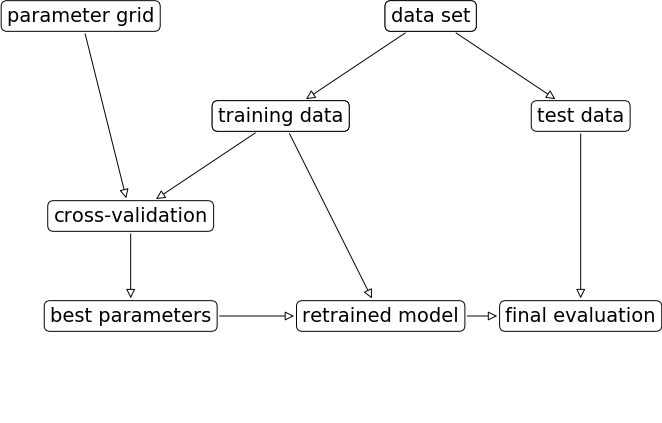

In [104]:
# 전체 모델 학습 및 평과 가정
mglearn.plots.plot_grid_search_overview()

### Sklearn 에서는 교차검증을 사용한 그리드서치를 위해 GridSearchCV 제공
* 딕셔너리로 검색 대상 매개변수 지정

In [106]:
param_grid = {'C': [0.001, 0.01, 0.1 , 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드 :\n", param_grid)

매개변수 그리드 :
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score= True)

In [108]:
X_train, X_test, y_train, t_test = train_test_split(iris.data, iris.target,
                                                   random_state=0)

### 교차 검증을 위한 그리드 서치
* GridSearchCV 객체는 분류기처럼 fit, predict, score 메소드 제공
* Fit 메소드는 최적 매개변수 찾기뿐 아니라 교차검증 성능이 가장 좋은 매개변수로 학습된 새로운 모델 생성
* 매개변수 조정 시 테스트 세트 사용하지 않음

In [109]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [110]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [111]:
# 최적의 매개변수 best_params_, best_score_ 저장
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 100, 'gamma': 0.01}
최고 교차 검증 점수: 0.97


In [113]:
# p.345 최적의 매개변수로 전체 훈련 세트를 사용하여 학습한 모델은
# best_estimator_ 속성에서 얻을 수 있다.
print("최고 성능 모델:\n", grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


# 평가 지표 및 측정 (p.356)
## 최종 목표를 기억하라

## 이진 분류의 평가 지표
## 에러의 종류
## 불균형 데이터셋

In [115]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test , y_train, y_test = train_test_split(
    digits.data, y, random_state = 0)

In [116]:
# 항상 다수인 클래스(여기서는 9가 아님)을 예측값으로 내놓는 DummyClassifier
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy= 'most_frequent').fit(X_train, y_train) # most_frequent : 가장 많은 타겟 라벨
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [117]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [118]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.83
logreg 점수: 0.98


* 무작위로 예측하는 DummyClassifier은 결과가 좋지 않음
* 반면 LogisticRegression 은 매우 좋으나 DummyClassifier도 83%를 맞추었으므로 실제로 이 결과가 유용한지 판단하기 매우 어렵다.
* imbalanced datasets에서 예측 성능을 정량화하는 데 정확도는 적절한 측정 방법이 아니다.
* 특히 pred_most_frequnet와 pred_dummy처럼 빈도나 무작위 기반 예측보다 얼마나 더 나은지 알려주는 평가지표가 필요

## 오차 행렬(Confusion matrices)
* confusion matrix 오차행렬은 binary classifier 평가 결과를 나타낼 때 가장 많이 사용하는 방법
* LogisitcRegression의 예측 결과를 confusion_matrix 함수를 사용해서 확인

In [121]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[401   2]
 [  8  39]]


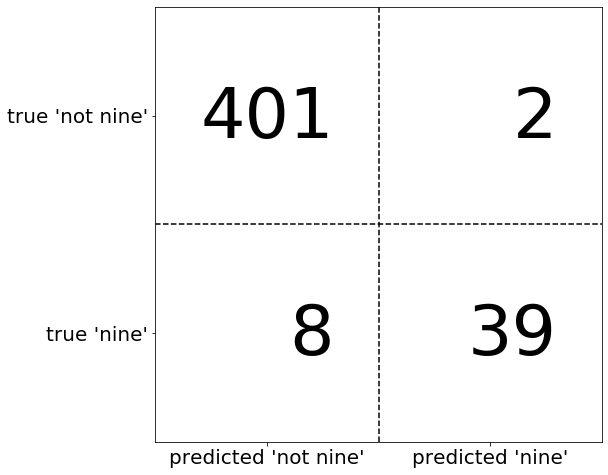

In [122]:
mglearn.plots.plot_confusion_matrix_illustration()

* confusion_matrix의 출력은 2x2 배열
* 행은 정답클래스에 해당하고, 열은 예측 클래스에 해당
* 각 항목의 숫자는 행에 해당하는 클래스(여기서는 9아님 과 9)가 얼마나 많이 열에 해당하는 클래스로 분류 되었는지를 나타냄

* confusion_matrix의 대각선 성분은 정확히 분류된 경우고, 다른 항목은 한 클래스의 샘플들이 다른 클래스로 잘못 분류된 경우가 얼마나 많은지를 보여줌
* 숫자 9를 양성 클래스로 정의하면 confusion matrix의 항목을 false positive와 false negative로 연결

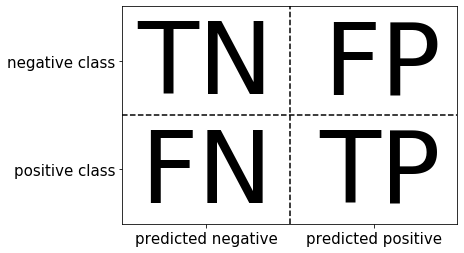

In [123]:
mglearn.plots.plot_binary_confusion_matrix()

* 이제 이 confusion matrx를 사용하여 앞서 만든 모델들
* DummyClassifier 2개와
* DecisionTreeClassfier
* LogisticRegression을 비교해보면

In [124]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n 무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n 로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

 무작위 더미 모델:
[[370  33]
 [ 38   9]]

결정 트리:
[[390  13]
 [ 24  23]]

 로지스틱 회귀
[[401   2]
 [  8  39]]


* confusion_matrix를 보면 pred_most_frequent에서 잘못된 것이 보입니다.
* 항상 동일한 클래스를 예측하기 떄문입니다.
* 반면에 pred_dummy는 특히 FN과 FP보다 TP가 매우 적고, TP보다 FP가 매우 많습니다.
* pred_logreg는 거의 모든 면에서 pred_tree보다 낫습니다.
* 이 행렬의 모든 면을 살펴보면 많은 정보를 얻을 수 있지만, 매우 수동적이며 정성적인 방법입니다.

### 정확도와의 관계
* 정확히 예측한 수 TP + TN을 전체 샘플 수로 나눈것이다.
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}


### 정밀도, 재현율, f- 점수
* 오차 행렬의 결과를 요약하는 여러 방법 중 가장 일반적인 것은 정밀도(precision)과 재현율(recall)이다.

\begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

* 재현율은 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용한다. 즉 거짓 음성(FN)을 피하는 것이 중요할 때다. 재현율을 민감도(sensitivity), 적중률(hit rate), 지짜 양성 비율(TPR)이라고도 한다.

\begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}


* 정밀도와 재현율의 조화 평균인 f-점수(f-score) 또는 f-측정(f-measure)은 이 둘을 하나로 요약해준다. 특별히 이 공식을 f1-점수라고도 한다. 어떤 모델이 좋은지 직관적으로 판단하는ㄷ ㅔ는 정확도보다 f1-점수가 낫다. 그러나 f1-점수는 정확도보다 이해하거나 설명하기 어렵다는게 단점이다.

In [128]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.20
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


* classification_report 함수는 정밀도, 재현율 f1-점수 모두를 한 번에 계산해서 깔끔하게 출력한다.

In [130]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                           target_names=["9아님", "9"]))

              precision    recall  f1-score   support

         9아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [131]:
print(classification_report(y_test, pred_dummy,
                           target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.91      0.92      0.91       403
           9       0.21      0.19      0.20        47

    accuracy                           0.84       450
   macro avg       0.56      0.55      0.56       450
weighted avg       0.83      0.84      0.84       450



In [132]:
print(classification_report(y_test, pred_logreg,
                           target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



### 정밀도 - 재현율 곡선과 ROC 곡선